# Hypothesis Tests and Confidence Intervals in Multiple Regression

In [1]:
# Hypothesis Tests for a single coefficient
# H0 : Bj = Bj,0 vs H1 : Bj != Bj,0 (Two sided alternative)
# Formulas in order to calculate T statistics and P value are written and shown in the Excel layout in Python folder

In [2]:
import pandas as pd
from statsmodels.formula.api import ols

data = pd.read_csv('caschool.csv')

# This is the regression from 7.5 

Multiple = ols("testscr ~ str + el_pct", data = data).fit()
Multiple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                testscr   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     155.0
Date:                Wed, 05 Aug 2020   Prob (F-statistic):           4.62e-51
Time:                        20:37:12   Log-Likelihood:                -1716.6
No. Observations:                 420   AIC:                             3439.
Df Residuals:                     417   BIC:                             3451.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    686.0322      7.411     92.566      0.000     671.464     700.600
str           -1.1013      0.380     -2.896      0.004      -1.849      -0.354
el_pct        -0.6498      0.039    -16.516      0.000      -0.727      -0.572
==============================================================================
Omnibus:                        0.631   Durbin-Watson:                   0.686
Prob(Omnibus):                  0.729   Jarque-Bera (JB):                0.550
Skew:                           0.088   Prob(JB):                        0.760
Kurtosis:                       3.024   Cond. No.                         301.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### From the output one can find out what the std err and t statistics of the variables

In [4]:
# This is the regression from 7.6

Triple = ols("testscr ~ str + expn_stu + el_pct", data=data).fit()
Triple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                testscr   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     107.5
Date:                Wed, 05 Aug 2020   Prob (F-statistic):           1.60e-51
Time:                        20:37:12   Log-Likelihood:                -1712.8
No. Observations:                 420   AIC:                             3434.
Df Residuals:                     416   BIC:                             3450.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    649.5779     15.206     42.719      0.000     619.688     679.468
str           -0.2864      0.481     -0.596      0.551      -1.231       0.658
expn_stu       0.0039      0.001      2.739      0.006       0.001       0.007
el_pct        -0.6560      0.039    -16.776      0.000      -0.733      -0.579
==============================================================================
Omnibus:                        0.046   Durbin-Watson:                   0.742
Prob(Omnibus):                  0.977   Jarque-Bera (JB):                0.070
Skew:                          -0.025   Prob(JB):                        0.966
Kurtosis:                       2.962   Cond. No.                     1.16e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
# In the book they alter the expn_stu column and divide every value by 1000 to make it in thousands of dollars
# So I do the same thing in here
data['Expn'] = data['expn_stu'] / 1000

# Doing the linear regression with our new variable
Triple = ols("testscr ~ str + Expn + el_pct", data=data).fit()
Triple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                testscr   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     107.5
Date:                Wed, 05 Aug 2020   Prob (F-statistic):           1.60e-51
Time:                        20:37:12   Log-Likelihood:                -1712.8
No. Observations:                 420   AIC:                             3434.
Df Residuals:                     416   BIC:                             3450.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    649.5779     15.206     42.719      0.000     619.688     679.468
str           -0.2864      0.481     -0.596      0.551      -1.231       0.658
Expn           3.8679      1.412      2.739      0.006       1.092       6.644
el_pct        -0.6560      0.039    -16.776      0.000      -0.733      -0.579
==============================================================================
Omnibus:                        0.046   Durbin-Watson:                   0.742
Prob(Omnibus):                  0.977   Jarque-Bera (JB):                0.070
Skew:                          -0.025   Prob(JB):                        0.966
Kurtosis:                       2.962   Cond. No.                         631.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 7.2 Tests of Joint Hypotheses
### H0 : B1 = B2 = 0 vs H1 : B1 and or B2 != 0

In [7]:
# F statistics
# Homoskedascitiy-only F-statistics:
# F = ((RsquareUnrestricted - RsquareRestricted) / q) / ((1-RsquareUnrestricted)/(n-k-1)) 

In [8]:
# Homoskedastic 
reg1 = ols("testscr ~ el_pct", data=data).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                testscr   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     296.4
Date:                Wed, 05 Aug 2020   Prob (F-statistic):           1.36e-50
Time:                        20:37:12   Log-Likelihood:                -1720.7
No. Observations:                 420   AIC:                             3445.
Df Residuals:                     418   BIC:                             3454.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    664.7394      0.941    706.687      0.000     662.890     666.588
el_pct        -0.6712      0.039    -17.216      0.000      -0.748      -0.595
==============================================================================
Omnibus:                        4.048   Durbin-Watson:                   0.680
Prob(Omnibus):                  0.132   Jarque-Bera (JB):                3.793
Skew:                           0.211   Prob(JB):                        0.150
Kurtosis:                       3.195   Cond. No.                         31.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
reg = ols("testscr ~ el_pct",data=data).fit(cov_type='HC1')
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                testscr   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     436.6
Date:                Wed, 05 Aug 2020   Prob (F-statistic):           6.69e-67
Time:                        20:37:12   Log-Likelihood:                -1720.7
No. Observations:                 420   AIC:                             3445.
Df Residuals:                     418   BIC:                             3454.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    664.7394      0.974    682.458      0.000     662.830     666.649
el_pct        -0.6712      0.032    -20.895      0.000      -0.734      -0.608
==============================================================================
Omnibus:                        4.048   Durbin-Watson:                   0.680
Prob(Omnibus):                  0.132   Jarque-Bera (JB):                3.793
Skew:                           0.211   Prob(JB):                        0.150
Kurtosis:                       3.195   Cond. No.                         31.9
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [10]:
# Table 1 skipped

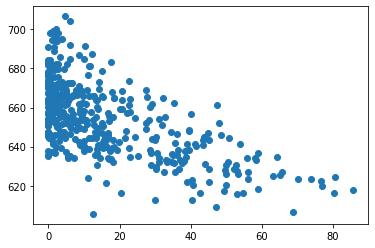

In [11]:
# Table 2
import matplotlib.pyplot as plt
plt.plot(data.el_pct, data.testscr, 'o')

Table 7.2 Scatterplots of Test Scores vs Four Student Characteristics


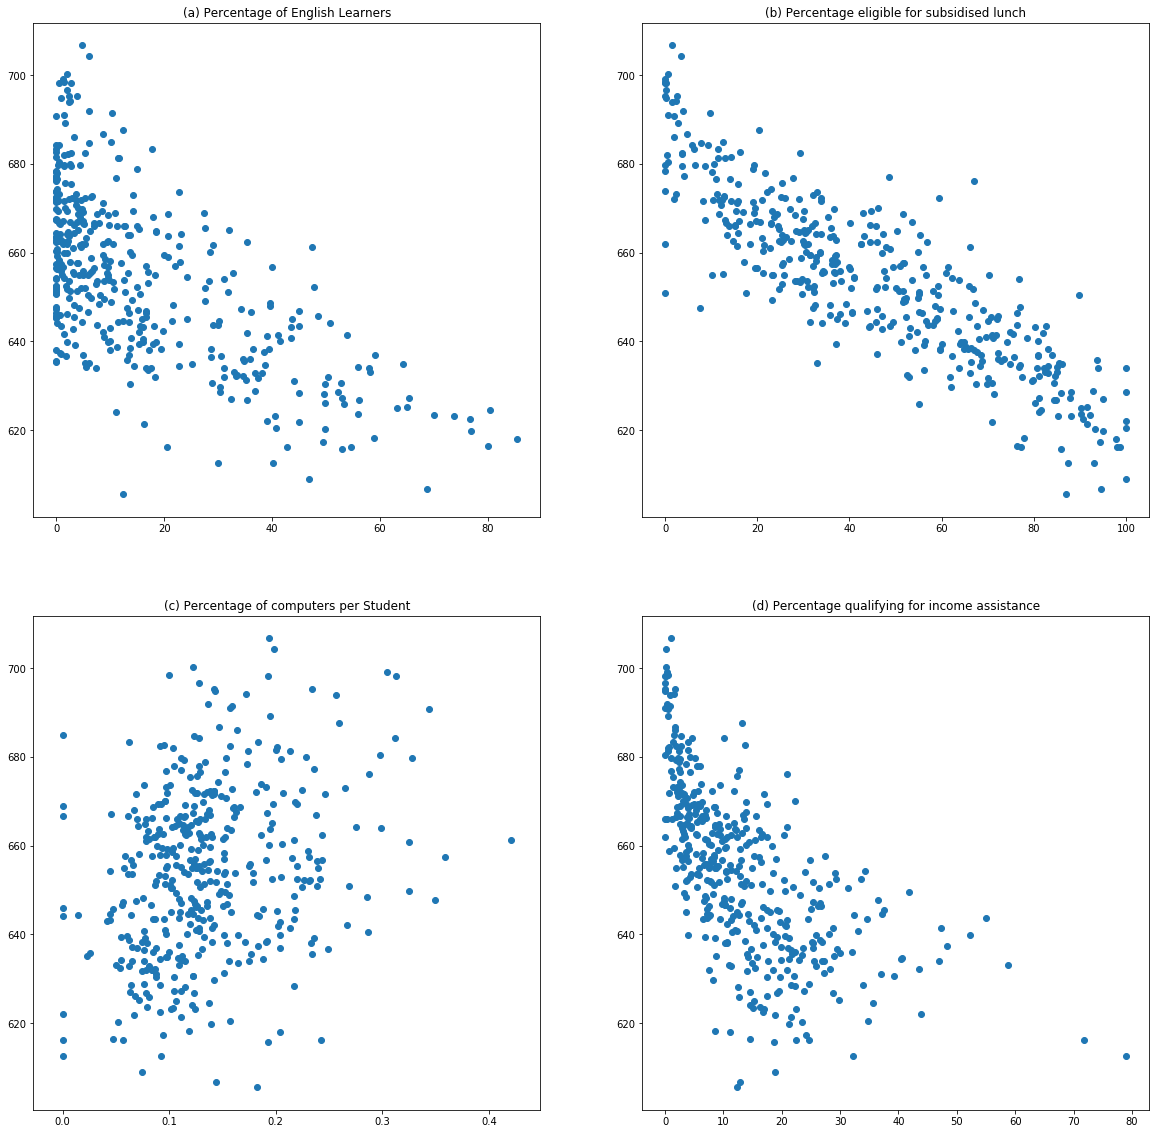

In [12]:
# These charts are given in the S&W Table 7.2 I also gave computer per student chart for extra information.
print('Table 7.2 Scatterplots of Test Scores vs Four Student Characteristics')
f, axarr = plt.subplots(2, 2, figsize=(20,20))
axarr[0,0].scatter(data.el_pct, data.testscr)
axarr[0,0].set_title('(a) Percentage of English Learners')
axarr[0,1].scatter(data.meal_pct, data.testscr)
axarr[0,1].set_title('(b) Percentage eligible for subsidised lunch')
axarr[1,0].scatter(data.comp_stu, data.testscr)
axarr[1,0].set_title('(c) Percentage of computers per Student')
axarr[1,1].scatter(data.calw_pct, data.testscr)
axarr[1,1].set_title('(d) Percentage qualifying for income assistance')
plt.show()


In [13]:
print('Table 7.1 Results of Regressions of Test Scores on the Student-Teacher Ratio and Student Characteristics Control Variables Using California Elementary School Districts')
reg1 = ols("testscr ~ str", data=data).fit()
reg2 = ols("testscr ~ str + el_pct", data=data).fit()
reg3 = ols("testscr ~ str + el_pct + meal_pct", data=data).fit(cov_type='HC1')
reg4 = ols("testscr ~ str + el_pct + calw_pct", data=data).fit()
reg5 = ols("testscr ~ str + el_pct + meal_pct + calw_pct", data=data).fit()
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
stargazer = Stargazer([reg1, reg2, reg3, reg4,reg5])
HTML(stargazer.render_html())


Table 7.1 Results of Regressions of Test Scores on the Student-Teacher Ratio and Student Characteristics Control Variables Using California Elementary School Districts


# Now let's go to the Practice questions

In [15]:
#1
import scipy.stats as st
print("P value is {:.4f}".format(2*st.norm.cdf(-abs(10.47/0.29))))
print("P value is {:.4f}".format(2*st.norm.cdf(-abs(10.44/0.29))))
print("P value is {:.4f}".format(2*st.norm.cdf(-abs(10.42/0.29))))

P value is 0.0000
P value is 0.0000
P value is 0.0000


In [16]:
#2
#a
t_stat = 10.47/0.29
print("CI is : [{0:.4f}, {1:.4f}]".format(10.47-st.norm.ppf(1-(0.05/2))*0.29, 10.47+st.norm.ppf(1-(0.05/2))*0.29))
#b
t_stat = -4.69/0.29
print("CI is : [{0:.4f}, {1:.4f}]".format(-4.69-st.norm.ppf(1-(0.05/2))*0.29, -4.69+st.norm.ppf(1-(0.05/2))*0.29))

CI is : [9.9016, 11.0384]
CI is : [-5.2584, -4.1216]


In [17]:
#3
#a
t_stat = 0.61/0.04
print("CI is : [{0:.4f}, {1:.4f}]".format(0.61-st.norm.ppf(1-(0.05/2))*0.04, 0.61+st.norm.ppf(1-(0.05/2))*0.04))
#b
print("CI is : [{0:.4f}, {1:.4f}]".format(5*(0.61-st.norm.ppf(1-(0.05/2))*0.04), 5*(0.61+st.norm.ppf(1-(0.05/2))*0.04)))

CI is : [0.5316, 0.6884]
CI is : [2.6580, 3.4420]


In [18]:
#4
#a
# Note instead of infinity I used 1000000, for some reason math.inf isn't working (even after importing the library)
if 9.32 > st.f.ppf(0.99, 3, 1000000):
    print('The regional effects are significant at the 1% level')
else:
    print('The regional effects are NOT significant at the 1% level')
#b
print('The 95% CI is [{0:.4f}, {1:.4f}]'.format(-0.44-st.norm.ppf(1-(0.05/2))*0.37, -0.44+st.norm.ppf(1-(0.05/2))*0.37))

The regional effects are significant at the 1% level
The 95% CI is [-1.1652, 0.2852]


In [19]:
# skipped to question 8
#a
Column1 = 1 - ((420-1-1)/(420-1)) * (1 - 0.049)
Column2 = 1 - ((420-2-1)/(420-1)) * (1 - 0.424)
Column3 = 1 - ((420-3-1)/(420-1)) * (1 - 0.773)
Column4 = 1 - ((420-3-1)/(420-1)) * (1 - 0.626)
Column5 = 1 - ((420-4-1)/(420-1)) * (1 - 0.773)
print(Column1,Column2,Column3,Column4,Column5)


0.05126968973747026 0.42674940334128875 0.7746252983293557 0.6286778042959427 0.7751670644391409
